In [9]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
#read dataset and generate dataframe
data = pd.read_csv('headbrain.csv', header=None, skiprows=1)
data.columns =['Gender','Age','Head_Size','Brain_Size']
print(data.shape)
data.head(5)

(237, 4)


,Gender,Age,Head_Size,Brain_Size
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [19]:
#Store all head size and brain size to comput X and Y
X = data['Head_Size'].values
Y = data['Brain_Size'].values

In [21]:
x_mean = np.mean(X)
y_mean = np.mean(Y)
n = len(X) #length of total entries

In [49]:
'''
Assume : E = sigma
formula : E(x - xmean)(y - ymean) / E(x-xmean)^2 
'''
numer = 0
deno = 0
for i in range(n):
    numer += (X[i] - x_mean) * (Y[i]-y_mean)
    deno += (X[i] - x_mean) ** 2
m = numer/deno
c = y_mean - (m * x_mean) #y = mx + c
print("slope : ", m)
print("coefficients : ", c)

slope :  0.26342933948939945
coefficients :  325.57342104944223


<class 'numpy.ndarray'>


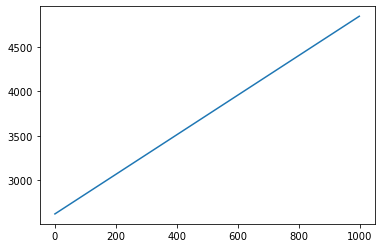

In [32]:
#line generated => y = 0.26342933948939945x + 325.57342104944223
x_max = np.max(X) + 100
x_min = np.min(X) - 100

x_line = np.linspace(x_min, x_max, 1000)
plt.plot(x_line)

<class 'numpy.ndarray'>


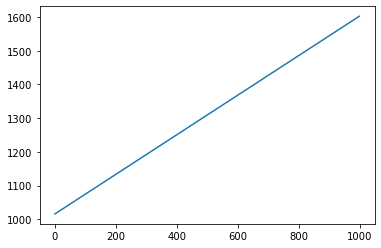

In [33]:
y_line = m * x_line + c
plt.plot(y_line)

Text(0, 0.5, 'brain_size')

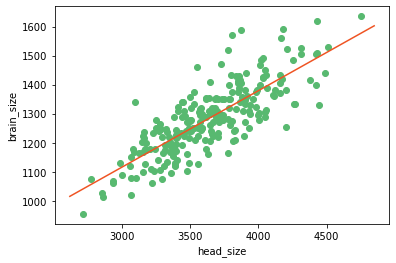

In [40]:
plt.scatter(X, Y, color='#58b970', label='Scatter Plot')
plt.plot(x_line, y_line, color='#ef5423', label='Regression Line')
plt.xlabel('head_size')
plt.ylabel('brain_size')

In [48]:

square_root_error = 0
square_root_total = 0
rsme = 0
for i in range(n):
    y_predict = m * X[i] + c
    square_root_error += (Y[i] - y_predict) ** 2
    square_root_total += (Y[i] - y_mean) ** 2
rsme = np.sqrt(square_root_error / n)
r2_score =  1 - (square_root_error / square_root_total)
# It’s time to evaluate the model and see how good it is for the final stage i.e., prediction.
print('Root mean square error : ' , rsme)
#R-squared value that measures how close the data are to the fitted line of best and in range of 0 to 1
print('R2 square : ', r2_score)

Root mean square error :  72.1206213783709
R2 square :  0.6393117199570003
